## Data cleaning, feature engineering, and modeling

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/voter-survey-december16.csv')

In [6]:
pattern = '(imiss_).{1}(_2016)'
def return_imiss_cols(df):
    imiss_cols = []
    for col in df.columns:
        if re.search(pattern, col):
            imiss_cols.append(col)
    return imiss_cols

# issue column list
imiss_col_list = return_imiss_cols(df)

In [7]:
# target column list  
target_col_list = ['presvote16post_2016']
df_target = df[target_col_list]

In [8]:
df_issue = df[imiss_col_list].fillna(0)
df_issue['imiss_j_2016'].value_counts()#.isna().sum()

1.0    5947
2.0    1688
3.0     181
0.0     127
4.0      57
Name: imiss_j_2016, dtype: int64

In [9]:
df_issue = df_issue.astype(str)
df_issue = df_issue.join(df_target)

In [10]:
df_dummies = pd.get_dummies(df_issue)

In [11]:
df_dummies.corr()['presvote16post_2016'].abs().sort_values(ascending=False)

presvote16post_2016    1.000000
imiss_l_2016_1.0       0.304989
imiss_d_2016_1.0       0.286253
imiss_y_2016_1.0       0.267083
imiss_u_2016_1.0       0.254038
imiss_x_2016_1.0       0.240264
imiss_g_2016_1.0       0.230016
imiss_p_2016_1.0       0.226241
imiss_l_2016_4.0       0.212959
imiss_u_2016_3.0       0.192896
imiss_q_2016_1.0       0.185467
imiss_g_2016_4.0       0.182592
imiss_d_2016_3.0       0.179266
imiss_l_2016_3.0       0.178131
imiss_y_2016_4.0       0.176428
imiss_p_2016_3.0       0.155080
imiss_y_2016_3.0       0.153542
imiss_j_2016_1.0       0.147418
imiss_x_2016_3.0       0.144682
imiss_i_2016_1.0       0.140380
imiss_f_2016_1.0       0.137812
imiss_s_2016_1.0       0.135825
imiss_i_2016_3.0       0.135604
imiss_k_2016_1.0       0.133861
imiss_r_2016_1.0       0.132862
imiss_h_2016_1.0       0.129626
imiss_x_2016_4.0       0.123174
imiss_q_2016_3.0       0.120913
imiss_i_2016_4.0       0.120097
imiss_e_2016_1.0       0.119690
                         ...   
imiss_r_

In [12]:
df_dummies.shape

(8000, 116)

In [13]:
df_predictors = df_dummies.drop('presvote16post_2016', axis=1)

In [14]:
df_predictors.head()

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_0.0,imiss_x_2016_1.0,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## K means clustering

In [15]:
X = df_predictors

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [17]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
labels = k_means.labels_

In [19]:
y_pred = k_means.predict(X)

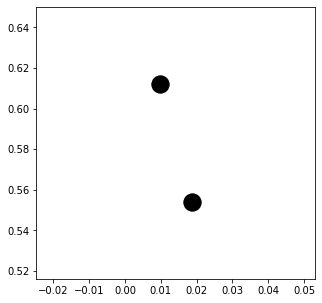

In [20]:
plt.figure(figsize=(5,5))
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=300)

In [21]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.09122755047749001

In [22]:
metrics.calinski_harabasz_score(X, labels)

836.4878129298589

In [23]:
df_target = df[target_col_list]
print(df_target.shape)
df_target_arr = np.ravel(df_target)

(8000, 1)


In [24]:
df_target_arr
y_pred.shape

(8000,)

In [25]:
dataset = pd.DataFrame({ 'y_pred': y_pred}, 
                        columns=[ 'y_pred']
                        )

In [26]:
dataset.head()

,y_pred
0,1
1,0
2,1
3,0
4,1


In [27]:
target_pred_df = df_predictors.join(df_target).join(dataset)
target_pred_df.head(10)

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0,presvote16post_2016,y_pred
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1.0,1
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2.0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1.0,1
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,3.0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,2.0,1
5,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1
6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1
7,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,2.0,0
8,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1.0,1
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1


In [28]:
count = 0
for row in target_pred_df.itertuples():
    if (row.presvote16post_2016 == 2): #and (row.y_pred == 0):
        count +=1
print(count)


3479


In [29]:
2578/3545

0.7272214386459802

In [30]:
2795/3479

0.8033917792469101

## Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [32]:
X = df_predictors
y = df_target
X.head()

,imiss_a_2016_0.0,imiss_a_2016_1.0,imiss_a_2016_2.0,imiss_a_2016_3.0,imiss_a_2016_4.0,imiss_b_2016_0.0,imiss_b_2016_1.0,imiss_b_2016_2.0,imiss_b_2016_3.0,imiss_b_2016_4.0,...,imiss_x_2016_0.0,imiss_x_2016_1.0,imiss_x_2016_2.0,imiss_x_2016_3.0,imiss_x_2016_4.0,imiss_y_2016_0.0,imiss_y_2016_1.0,imiss_y_2016_2.0,imiss_y_2016_3.0,imiss_y_2016_4.0
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [33]:
X.isna().sum().any()
y.isna().sum()

presvote16post_2016    394
dtype: int64

In [34]:
y = y.fillna(0)
y = np.ravel(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2, 
                                                    stratify=y)

In [36]:
lr = LogisticRegression(C=2, penalty='l2', 
                        solver='lbfgs', 
                        multi_class='auto', 
                        max_iter=1000)
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

In [34]:
df_target.columns

Index(['presvote16post_2016'], dtype='object')

In [35]:
cm = confusion_matrix(y_test, y_pred_test)
conf_matrix = pd.DataFrame(cm, index=['None','Clinton','Trump','Johnson','Stein','McMullin','Other','Did not vote'], 
                           columns=['Pred None','Pred Clinton','Pred Trump','Pred Johnson','Pred Stein','Pred McMullin','Pred Other','Pred Did Not Vote'])


conf_matrix

,Pred None,Pred Clinton,Pred Trump,Pred Johnson,Pred Stein,Pred McMullin,Pred Other,Pred Did Not Vote
None,3,35,40,1,0,0,0,0
Clinton,1,631,74,2,0,0,1,0
Trump,1,56,638,1,0,0,0,0
Johnson,0,18,25,2,0,0,1,0
Stein,0,19,3,0,0,0,0,0
McMullin,0,1,4,0,0,0,0,0
Other,0,21,15,0,0,0,0,0
Did not vote,0,4,3,0,0,0,0,0


In [36]:
# correct Clinton
correct = cm[1][1]
total = sum(cm[1])
pred_correct = correct/total
pred_correct

0.8899858956276445

In [37]:
# correct Trump
correct = cm[2][2]
total = sum(cm[2])
pred_correct = correct/total
pred_correct

0.9166666666666666

In [38]:
len(lr.coef_[1])

115

In [39]:
coef_dict = dict(zip(X.columns, lr.coef_[0]))
coef_dict

{'imiss_a_2016_0.0': -0.10404943923081895,
 'imiss_a_2016_1.0': 0.24291226743981922,
 'imiss_a_2016_2.0': 0.052454660109609245,
 'imiss_a_2016_3.0': -0.29717277119798446,
 'imiss_a_2016_4.0': 0.10704905782829288,
 'imiss_b_2016_0.0': -0.4615256539571386,
 'imiss_b_2016_1.0': -0.30731225914731,
 'imiss_b_2016_2.0': 0.05347887370036297,
 'imiss_b_2016_3.0': 0.4948771019259455,
 'imiss_b_2016_4.0': 0.2216757124270555,
 'imiss_c_2016_0.0': 0.19465896217776532,
 'imiss_c_2016_1.0': 0.08635564123587226,
 'imiss_c_2016_2.0': -0.3811358771341699,
 'imiss_c_2016_3.0': -0.233542956069862,
 'imiss_c_2016_4.0': 0.334858004739315,
 'imiss_d_2016_0.0': -0.29704777907230845,
 'imiss_d_2016_1.0': 0.28875836727032816,
 'imiss_d_2016_2.0': 0.0569467081474142,
 'imiss_d_2016_3.0': -0.025042447137693945,
 'imiss_d_2016_4.0': -0.02242107425882628,
 'imiss_e_2016_0.0': -0.12026786799092809,
 'imiss_e_2016_1.0': -0.23658352569064514,
 'imiss_e_2016_2.0': 0.09550461315036,
 'imiss_e_2016_3.0': -0.021583057925

## Feature importance

In [40]:
from sklearn.feature_selection import RFE
predictors = X_train
selector = RFE(lr, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [41]:
len(X_train.columns)

115

In [42]:
order = selector.ranking_
len(order)
order

array([ 57,  85, 107,  39, 106,  30,  77,  76,  23,  32,  97,  80,  22,
        21,  37,  75,  10, 104,  95,  64,  52,  11,  92,  54,  34,  24,
         9, 114,  18,  17,  60,  41, 111, 115,  49,  29,  99,  98, 100,
        31,  45,  94,  89,  63,  62,  79,  50,  51,  26,  13,  71,  84,
       113,  36,  16,  20,   1,  65,  42,   2,  81,  88, 109,  14,   7,
        46,  53, 110,  70,  28,  83,  73, 108,  59,  74, 101,  48,  47,
        87,  69, 105,  90,  43,  25,   8,  86,  82, 102,  44,  15,  91,
        33, 112,  66,   5,  68,  35,  40,  78,  56,  72,  27,  96,   6,
         3,  55,  12,  93,  58,  38,  61,  19,  67, 103,   4])

In [43]:
df_predictors.columns

Index(['imiss_a_2016_0.0', 'imiss_a_2016_1.0', 'imiss_a_2016_2.0',
       'imiss_a_2016_3.0', 'imiss_a_2016_4.0', 'imiss_b_2016_0.0',
       'imiss_b_2016_1.0', 'imiss_b_2016_2.0', 'imiss_b_2016_3.0',
       'imiss_b_2016_4.0',
       ...
       'imiss_x_2016_0.0', 'imiss_x_2016_1.0', 'imiss_x_2016_2.0',
       'imiss_x_2016_3.0', 'imiss_x_2016_4.0', 'imiss_y_2016_0.0',
       'imiss_y_2016_1.0', 'imiss_y_2016_2.0', 'imiss_y_2016_3.0',
       'imiss_y_2016_4.0'],
      dtype='object', length=115)

In [44]:
for i in df_predictors.index:
    rank = np.array(order)
    feat = np.array(df_predictors.columns)
    rank_feat = pd.DataFrame(rank,feat, columns=['rank'])

In [165]:
rank_feat.sort_values(by='rank').tail(10)

,rank
imiss_s_2016_3.0,106
imiss_u_2016_2.0,107
imiss_d_2016_3.0,108
imiss_d_2016_2.0,109
imiss_q_2016_4.0,110
imiss_o_2016_2.0,111
imiss_n_2016_2.0,112
imiss_x_2016_2.0,113
imiss_e_2016_2.0,114
imiss_g_2016_3.0,115


## Cross-validation

In [40]:
from sklearn.model_selection import cross_val_score

In [153]:
y = y.fillna(0)

In [154]:
X.isna().sum().any()

False

In [158]:
y = np.ravel(y)
y.shape

(8000,)

In [159]:
scores = cross_val_score(lr, X, y, cv=5)

In [160]:
scores

array([0.82033687, 0.76966292, 0.7825    , 0.7804878 , 0.78070175])

## Random forest

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
score = accuracy_score(y_test, y_pred_test)

/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
score

0.78

In [41]:
scores = cross_val_score(rf, X, y, cv=5)

In [42]:
scores

array([0.80848409, 0.75280899, 0.76125   , 0.76297686, 0.7612782 ])

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv=5)
scores

array([0.80723643, 0.74906367, 0.754375  , 0.75547217, 0.76253133])

In [45]:
from sklearn.svm import SVC

In [47]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_test = svm.predict(X_test)
score = accuracy_score(y_test, y_pred_test)
score

0.790625

In [48]:
scores = cross_val_score(svm, X, y, cv=5)
scores

array([0.82283219, 0.77028714, 0.785625  , 0.78549093, 0.78070175])

In [50]:
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred_test = svm.predict(X_test)
score = accuracy_score(y_test, y_pred_test)
score

0.505